# **Hospital Length of Stay (LOS) Prediction**

## **Context:**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

## **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

## Loading data and first information

In [5]:
# Frameworks for manipulating, analyzing and visualizing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)


In [6]:
# Loading the data
data = pd.read_csv('healthcare_data.csv')
same_data = data.copy()
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [4]:
# Have a first informative look at the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

In [5]:
# We don't want our model to rely on a specific patient_id
data = data.drop(columns=['patientid'])

In [6]:
# We search for duplicates
data.duplicated().sum()

0

In [7]:
# We have a first look on descriptive statistics 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


In [8]:
# Lets explore the categorical variables
cat_col = ['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender', 'Type of Admission', 
           'Severity of Illness', 'health_conditions', 'Insurance']

for columns in cat_col:
    print(data[columns].value_counts(1))
    print('-'*50)

Department
gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: proportion, dtype: float64
--------------------------------------------------
Ward_Facility_Code
F    0.241076
D    0.238110
B    0.207770
E    0.190748
A    0.093102
C    0.029194
Name: proportion, dtype: float64
--------------------------------------------------
doctor_name
Dr Sarah     0.199192
Dr Olivia    0.196704
Dr Sophia    0.149506
Dr Nathan    0.141554
Dr Sam       0.111422
Dr John      0.102526
Dr Mark      0.088820
Dr Isaac     0.006718
Dr Simon     0.003558
Name: proportion, dtype: float64
--------------------------------------------------
Age
21-30     0.319586
31-40     0.266746
41-50     0.160812
11-20     0.093072
61-70     0.053112
51-60     0.043436
71-80     0.037406
81-90     0.016362
0-10      0.006736
91-100    0.002732
Name: proportion, dtype: float64
------------------------------------------

## EDA - Analytics

### Univariate Analysis

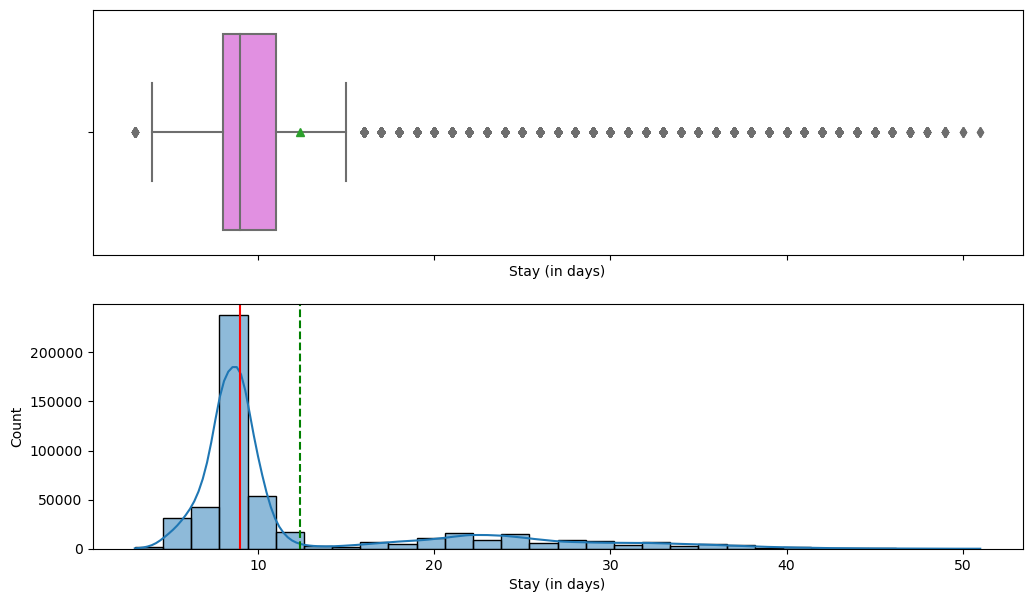

In [9]:
# Creating a function for plotting
def histogram_boxplot(data, feature, figsize=(12,7), kde=True, bins=None):
    
    figure,(ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=figsize)
    
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color='violet')
    
    if bins==None:
        sns.histplot(data=data, x=feature, kde=True, ax=ax_hist)
    else:
        sns.histplot(data=data, x=feature, kde=True, ax=ax_hist, bins=bins)
    
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='red', linestyle='-')
    
# Let's have a look at our target variable
histogram_boxplot(data, 'Stay (in days)', bins=30)                         

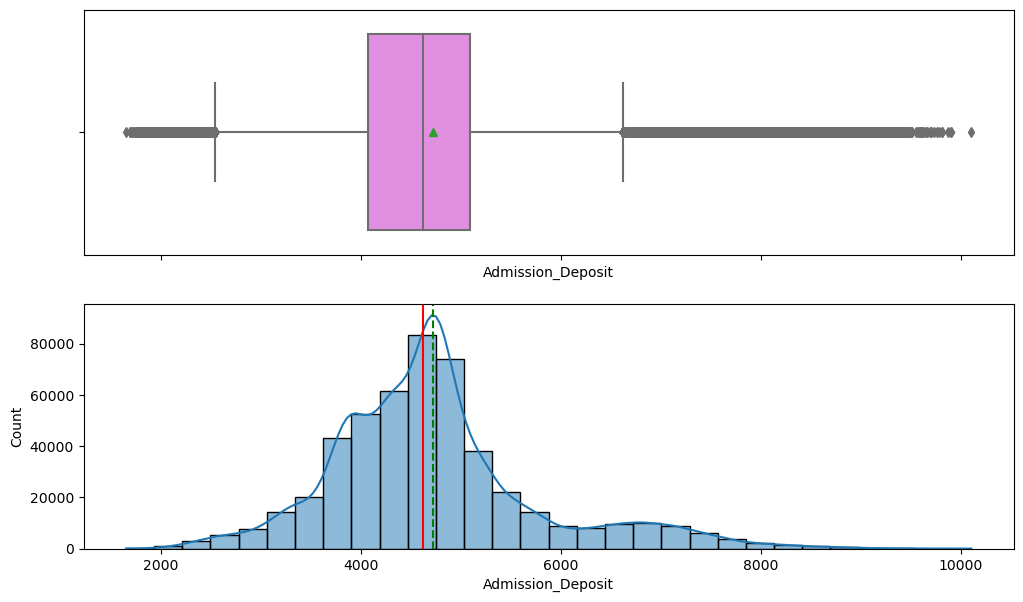

In [10]:
# Now we will have a look at some other features in the dataset
histogram_boxplot(data, 'Admission_Deposit', bins=30) 

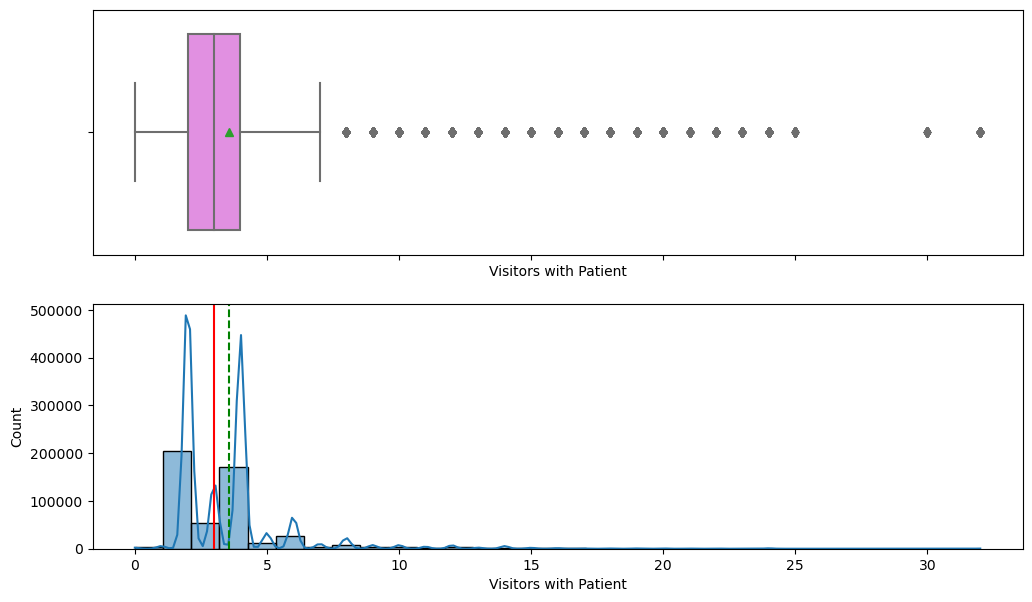

In [11]:
histogram_boxplot(data, 'Visitors with Patient', bins=30)

### Bivariate Analysis

In [12]:
data_num = data.select_dtypes(include=[np.number]) # create a dataset just with the numbers
data_num.corr()

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days)
Available Extra Rooms in Hospital,1.000000,-0.001784,0.070459,-0.050127,-0.019219
staff_available,-0.001784,1.000000,0.000578,0.000763,0.007398
Visitors with Patient,0.070459,0.000578,1.000000,-0.069043,0.027302
Admission_Deposit,-0.050127,0.000763,-0.069043,1.000000,0.044203
Stay (in days),-0.019219,0.007398,0.027302,0.044203,1.000000


<Axes: >

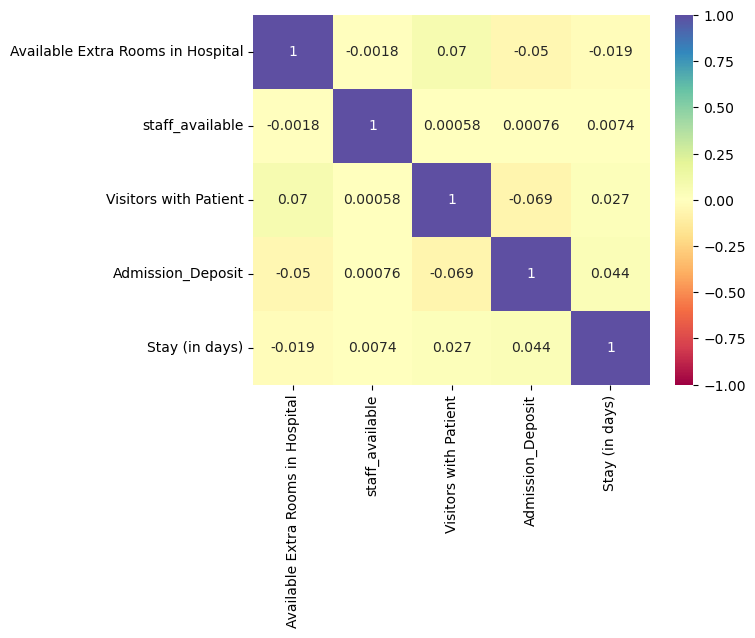

In [13]:
sns.heatmap(data_num.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)

<Axes: xlabel='Ward_Facility_Code', ylabel='Stay (in days)'>

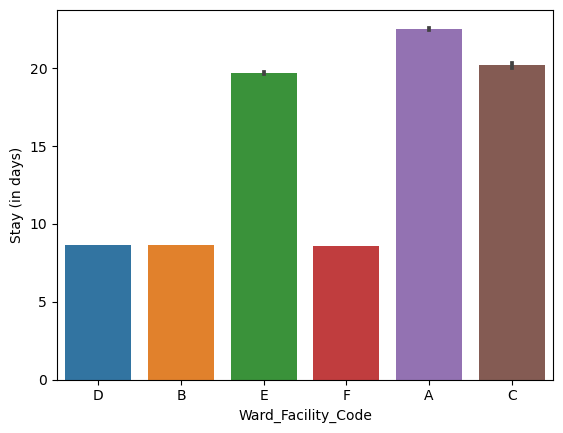

In [14]:
sns.barplot(x='Ward_Facility_Code', y='Stay (in days)', data=data)

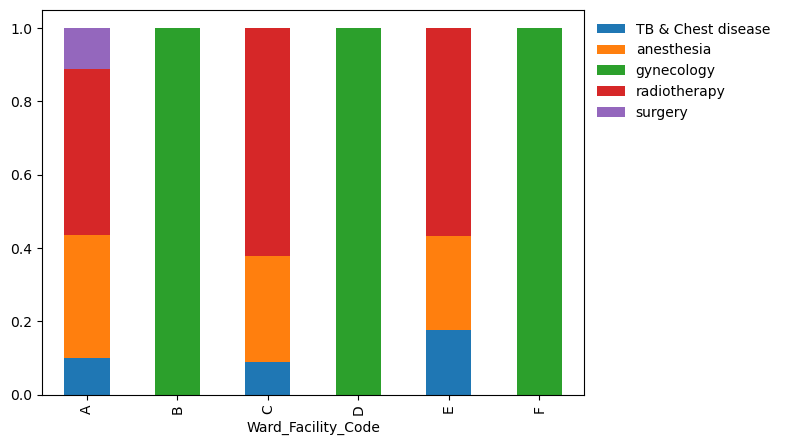

In [15]:
# Creating a special stacked barplot
def stack_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
    tab.plot(kind='bar', stacked=True, figsize=(count + 1, 5))
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), frameon=False)

stack_barplot(data, 'Ward_Facility_Code', 'Department')

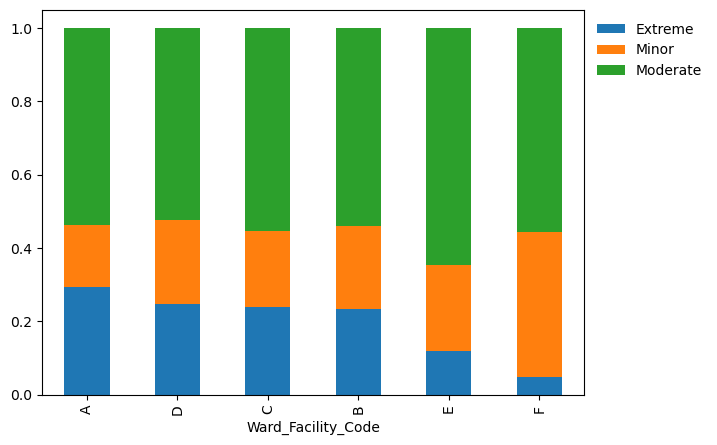

In [16]:
stack_barplot(data, 'Ward_Facility_Code', 'Severity of Illness')

<Axes: xlabel='Age', ylabel='Stay (in days)'>

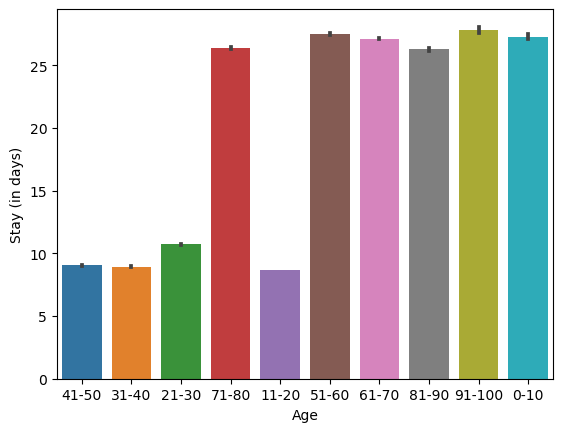

In [17]:
# Creating a normal barplot
sns.barplot(x='Age', y='Stay (in days)', data=data)

In [18]:
data.groupby(['doctor_name'])['Department'].agg(Department_name='unique', Patients_treated='count')

,Department_name,Patients_treated
doctor_name,,
Dr Isaac,[surgery],3359
Dr John,"[TB & Chest disease, anesthesia, radiotherapy]",51263
Dr Mark,"[anesthesia, TB & Chest disease]",44410
Dr Nathan,[gynecology],70777
Dr Olivia,[gynecology],98352
Dr Sam,[radiotherapy],55711
Dr Sarah,[gynecology],99596
Dr Simon,[surgery],1779
Dr Sophia,[gynecology],74753


## Building the machine learning models

In [7]:
# Preparing the dataset for our models
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include=['object', 'category']).columns.tolist(),
    dtype=int,
    drop_first = True
)

In [8]:
x = data.drop('Stay (in days)', axis=1)
y = data['Stay (in days)']

### Decision Tree Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [10]:
# Split the dataset into a train and a testset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle=True, random_state=1)

In [11]:
x_train.shape, x_test.shape

((400000, 42), (100000, 42))

In [12]:
# Creating functions for metrics
def adj_r2_score(predictors, targets, predictions):
    r2=r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - (1-r2*(n-1) / (n-k-1))

In [13]:
def mape_score(targets, predictions):
    return np.mean(np.abs(targets-predictions)/targets) * 100

In [14]:
def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)
        
    df_perf = pd.DataFrame(
        {
            'RMSE' : rmse,
            'MAE': mae,
            'R-squared': r2,
            'Adj. R-squared': adjr2,
            'MAPE': mape
        },
        index = [0]
    )
    return df_perf

In [15]:
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [16]:
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)
dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.857789,1.16294,0.945193,0.94559,9.624177


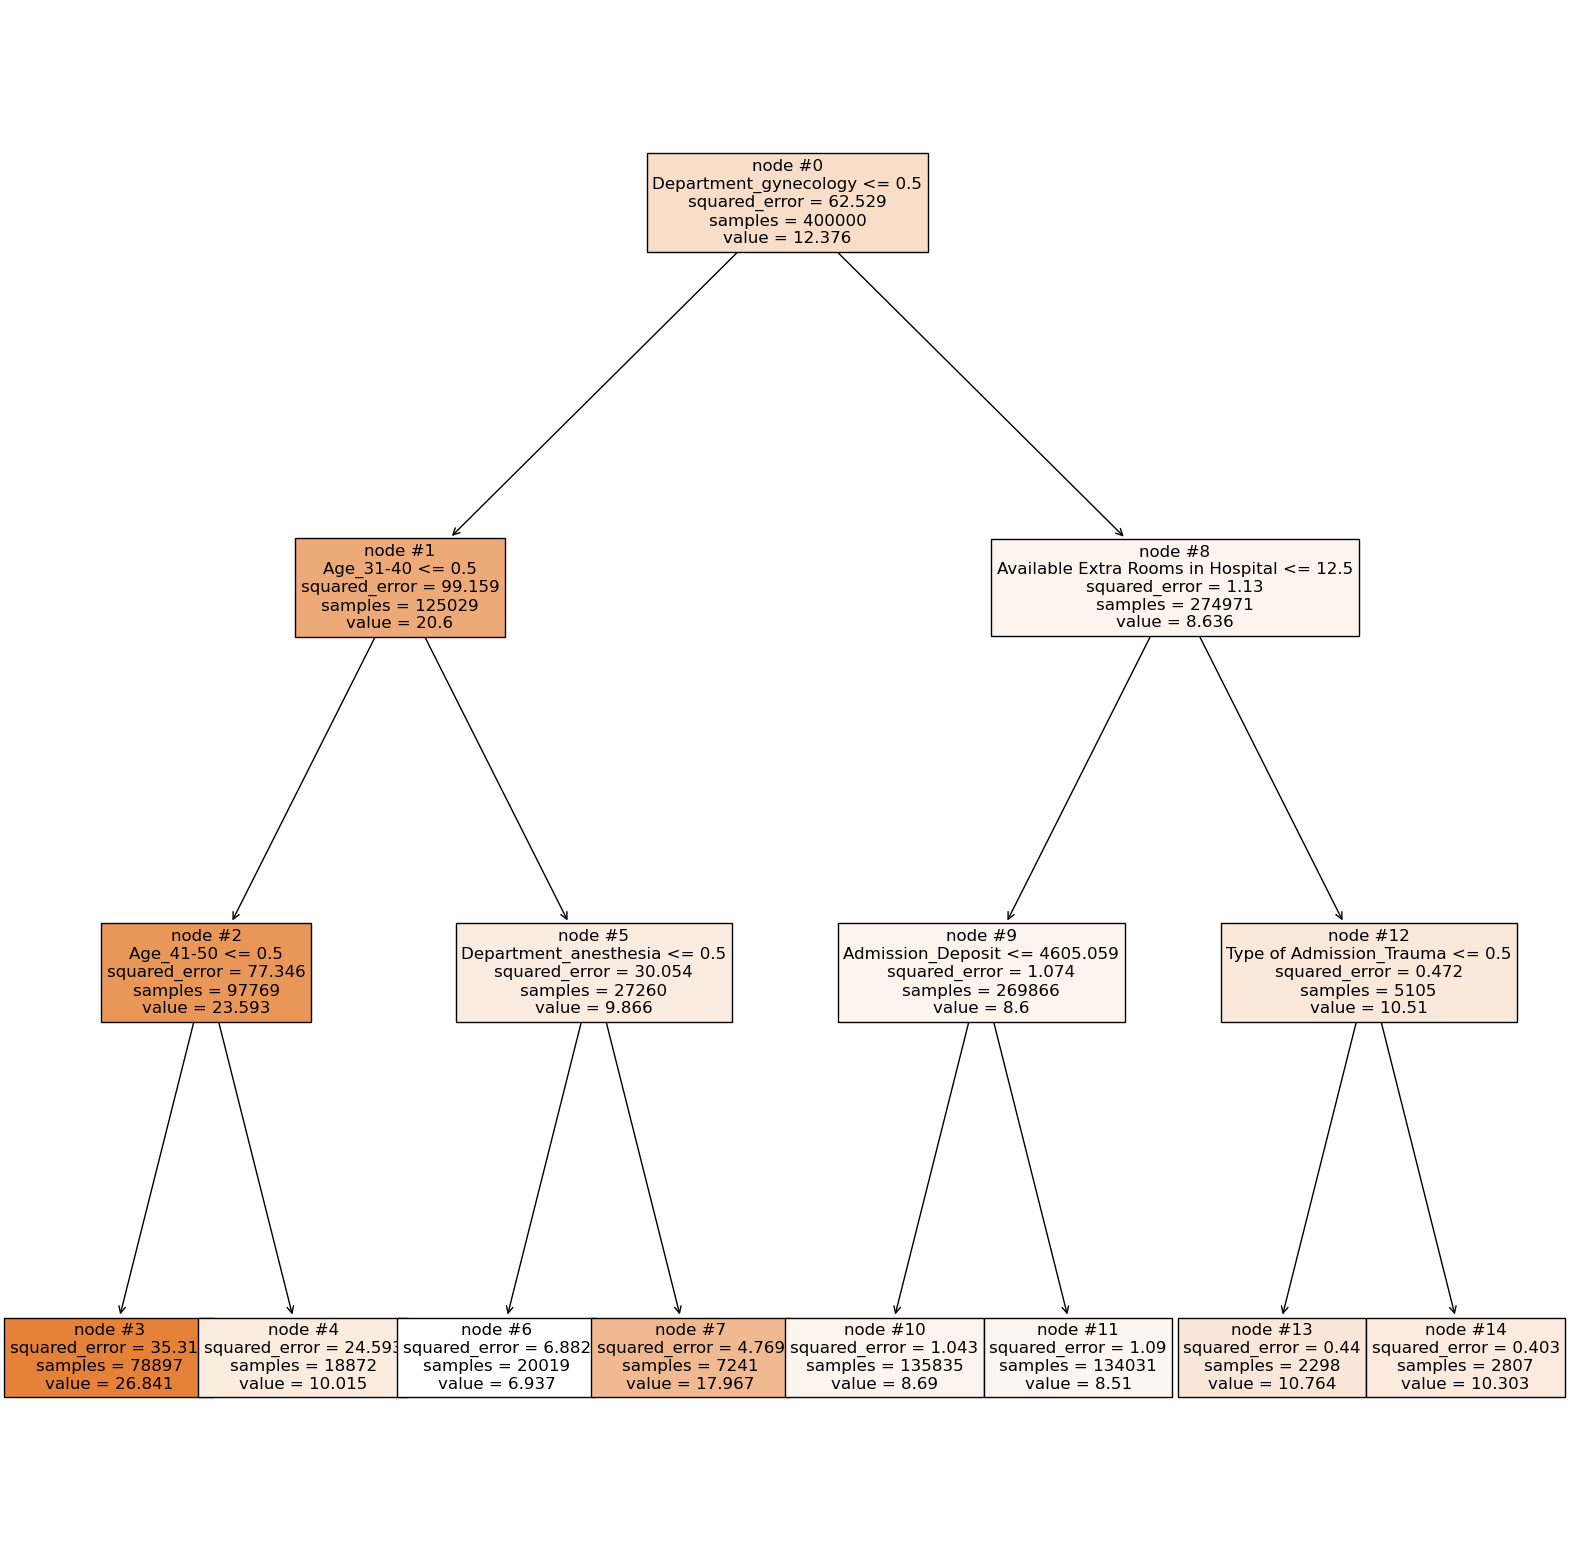

In [17]:
# Visualize the decission tree based on defined depth
from sklearn import tree

features = list(x.columns)

# Building the model with max_depth=3
dt_regressor_visualize = DecisionTreeRegressor(random_state=1, max_depth=3)

# Fitting the model
dt_regressor_visualize.fit(x_train, y_train)

plt.figure(figsize=(20, 20))
tree.plot_tree(dt_regressor_visualize, feature_names=features, filled=True, fontsize=12, node_ids=True)
plt.show()


In [18]:
# Another way of plotting insights from the decision tree
print(tree.export_text(dt_regressor_visualize, feature_names=features, show_weights=True))

|--- Department_gynecology <= 0.50
|   |--- Age_31-40 <= 0.50
|   |   |--- Age_41-50 <= 0.50
|   |   |   |--- value: [26.84]
|   |   |--- Age_41-50 >  0.50
|   |   |   |--- value: [10.02]
|   |--- Age_31-40 >  0.50
|   |   |--- Department_anesthesia <= 0.50
|   |   |   |--- value: [6.94]
|   |   |--- Department_anesthesia >  0.50
|   |   |   |--- value: [17.97]
|--- Department_gynecology >  0.50
|   |--- Available Extra Rooms in Hospital <= 12.50
|   |   |--- Admission_Deposit <= 4605.06
|   |   |   |--- value: [8.69]
|   |   |--- Admission_Deposit >  4605.06
|   |   |   |--- value: [8.51]
|   |--- Available Extra Rooms in Hospital >  12.50
|   |   |--- Type of Admission_Trauma <= 0.50
|   |   |   |--- value: [10.76]
|   |   |--- Type of Admission_Trauma >  0.50
|   |   |   |--- value: [10.30]



### Ensemble Learning - Bagging, Random Forest, Ada Boost, Gradient Boosting

In [19]:
# Bagging
bagging_estimator = BaggingRegressor(random_state=1)
bagging_estimator.fit(x_train, y_train)

BaggingRegressor(random_state=1)

In [20]:
bagging_estimator_per_test = model_performance_regression(bagging_estimator, x_test, y_test)
bagging_estimator_per_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.3869,0.923239,0.969456,0.969863,7.809754


In [21]:
# Random Forest
rf_regressor = RandomForestRegressor(random_state=1)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [22]:
rf_regressor_per_test = model_performance_regression(rf_regressor, x_test, y_test)
rf_regressor_per_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.3183,0.879404,0.972402,0.972811,7.453083


In [23]:
# Ada Boost
from sklearn.ensemble import AdaBoostRegressor

In [24]:
ada_regressor = AdaBoostRegressor(random_state=1)
ada_regressor.fit(x_train, y_train)

AdaBoostRegressor(random_state=1)

In [25]:
ada_regressor_per_test = model_performance_regression(ada_regressor, x_test, y_test)
ada_regressor_per_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.375388,1.58689,0.910399,0.910782,13.623722


In [27]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
grad_regressor = GradientBoostingRegressor(random_state=1)
grad_regressor.fit(x_train, y_train)

GradientBoostingRegressor(random_state=1)

In [30]:
grad_regressor_per_test = model_performance_regression(grad_regressor, x_test, y_test)
grad_regressor_per_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.792721,1.212749,0.948965,0.949364,10.247284


In [31]:
# XG Boosting (extrem Gradient Bossting)
!pip install xgboost

In [33]:
from xgboost import XGBRegressor

In [34]:
xgb_regressor = XGBRegressor(random_state=1)
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [37]:
xgb_regressor_per_test = model_performance_regression(xgb_regressor, x_test, y_test)
xgb_regressor_per_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.512677,1.03346,0.963664,0.964069,8.858492


In [43]:
# Models Test Compare Dataframe
models_test_compare_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        bagging_estimator_per_test.T,
        rf_regressor_per_test.T,
        ada_regressor_per_test.T,
        grad_regressor_per_test.T,
        xgb_regressor_per_test.T   
    ],
    axis=1
)

In [47]:
# Our combined metrics
models_test_compare_df.columns = [
    'dt_regressor_perf_test',
    'bagging_estimator_per_test',
    'rf_regressor_per_test',
    'ada_regressor_per_test',
    'grad_regressor_per_test',
    'xgb_regressor_per_test'
]

models_test_compare_df.T

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
dt_regressor_perf_test,1.857789,1.162940,0.945193,0.945590,9.624177
bagging_estimator_per_test,1.386900,0.923239,0.969456,0.969863,7.809754
rf_regressor_per_test,1.318300,0.879404,0.972402,0.972811,7.453083
ada_regressor_per_test,2.375388,1.586890,0.910399,0.910782,13.623722
grad_regressor_per_test,1.792721,1.212749,0.948965,0.949364,10.247284
xgb_regressor_per_test,1.512677,1.033460,0.963664,0.964069,8.858492
